# Homework 04
- read up on abstract data types (list, queue, stack, deque) on wikipedia

Please fill in: Pavan Venkatesh Hosatti

## Introduction

In [7]:
# Using a Python list (array), observe what the following functions do:
s=[2,3,4]
s.append(5)
s.insert(0, 1)
print (s)
print ("s:",s)
print ("pop(): ", s.pop())
print ("s:", s)
print ("pop(): ", s.pop())
print ("s:", s)
print ("pop(0): ", s.pop(0))
print ("s:", s)

[1, 2, 3, 4, 5]
s: [1, 2, 3, 4, 5]
pop():  5
s: [1, 2, 3, 4]
pop():  4
s: [1, 2, 3]
pop(0):  1
s: [2, 3]


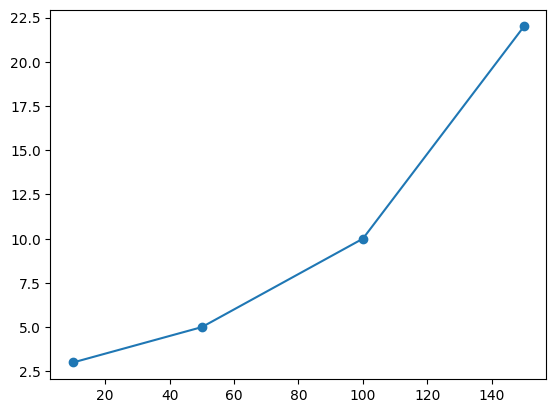

In [1]:
# plotting works very similar to MATLAB
%matplotlib inline
import matplotlib.pyplot as plt
x = [10, 50, 100, 150]
y = [3, 5, 10, 22]

plt.plot(x, y, 'o-')
plt.show()

In [20]:
class MyStack:
    """ simple stack implemented using a Python list (array)"""
    def __init__(self):
        self.data = []
        
    def push(self,x):
        self.data.append(x)
        
    def pop(self):
        return self.data.pop()
    
    def is_empty(self):
        return len(self.data) == 0
    
s = MyStack()
s.push(3)
s.push(4)
s.push(5)
print (s.pop(), s.pop(), s.pop())
print (s.is_empty())

5 4 3
True


In [11]:
def stack_fill_and_empty(n):
    S = MyStack()
    for item in range(n):
        S.push(item)
        
    while n>0:
        S.pop()
        n -= 1

sizes = [10000, 20000, 40000, 80000, 160000, 320000]
for n in sizes:
    %timeit stack_fill_and_empty(n)

1.63 ms ± 4.61 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.25 ms ± 4.58 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.51 ms ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.1 ms ± 4.03 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.5 ms ± 88.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
53.1 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1]:
import numpy as np
def fit_poly(x,y,k):
    n = len(x)
    x = np.array(x)
    y = np.array(y)
    A = np.zeros((n,k+1))
    for i in range(k+1):
        A[:,i] = np.array(x)**i
        
    c = np.linalg.lstsq(A,y,rcond=None)[0]
    misfit = np.linalg.norm(np.dot(A,c)-y)    
    return c, misfit

In [29]:
x = [sizes]
y = [5, 9.96, 19.9, 41, 80, 167]
c, misfit = fit_poly(x, y, 1) # find a good coefficient!
print ("coefficients:",c)
print ("misfit:", misfit)

coefficients: [-50.312        2.97491429]
misfit: 60.24461583529982


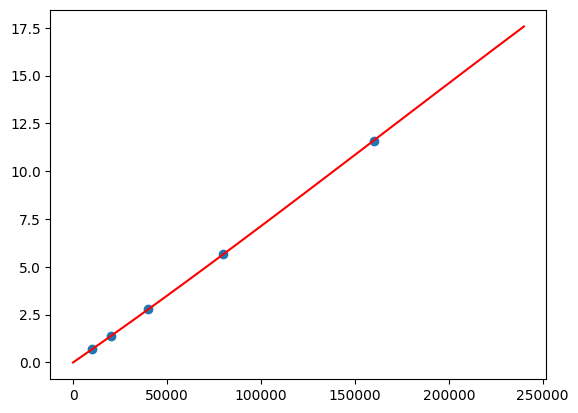

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
xx = np.linspace(0,1.5*x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

In [5]:
# alternatively fitting f(x)=c0 x^c1:
c, misfit = fit_poly(np.log(x),np.log(y),1)
print ("best fitting polynomial:",np.exp(c[0]),"x^",c[1])

best fitting polynomial: 0.5376268894642623 x^ 0.6685889530708399


We can conclude that pushing n elements to the stack and removing them again takes O(n) time. This means each operation is O(1) (on average!) 

## 1. Test queue operations using a Python list
We first use a Python list (dynamically sized array) as an (inefficient) queue. Our test consists of queueing n elements and then dequeueing all of them. Complete the code below, time for different n, create a fit of the right degree and conclude what the cost of queueing and dequeueing one element is.

In [3]:
def fill_and_empty_queue_using_list(n):
    L = []
    for item in range(n):
        # queue item in L (add to end):
        L.append(item)
        
    while n>0:
        # dequeue item in L (remove from start):
        L.pop(0)
        n -= 1

sizes = [10000,20000,40000,80000,160000]
for n in sizes:
    %timeit fill_and_empty_queue_using_list(n)

6.25 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
26.2 ms ± 15 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
121 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
492 ms ± 284 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.97 s ± 3.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


coefficients: [-3.36862745e+00  3.68184693e-05  7.68586338e-08]
misfit: 2.5290319353547646


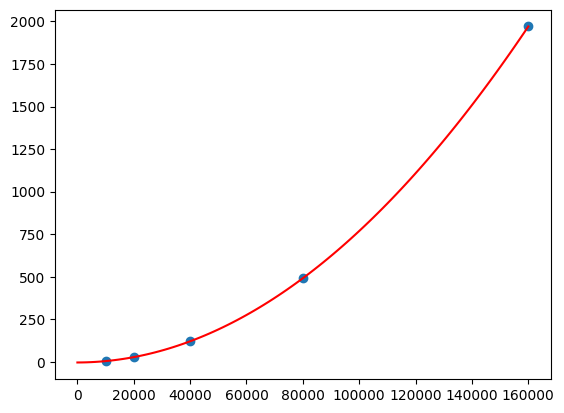

In [36]:
x = sizes
y = [6.25,26.2,121,492,1970]
c, misfit = fit_poly(x,y,2)
print ("coefficients:",c )
print ("misfit:", misfit)

xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

In [31]:
c, misfit = fit_poly(np.log(x),np.log(y),1)
print ("best fitting polynomial:",np.exp(c[0]),"x^",c[1])

best fitting polynomial: 2.95124685060934e-08 x^ 2.083126704782718


fill_and_empty_queue_using_list(n) takes O(N^2). To conclude:
1. enqueue one element (append to a list) takes O(1)
2. dequeuing one element (remove from the left) takes O(N)
3. while removing the last element in a list takes O(1).

## 2. Using a deque
First determine the correct functions to call to enqueue (add to the right) and dequeue (pop from the left) an element from a deque. Try it out in the next block (it should print 1, then 2, then 3).
Then complete dequeue_fill_and_empty() with those commands, benchmark it, fit a curve, and conclude.

In [2]:
from collections import deque
Q = deque()
Q.append(1) # enqueue 1
Q.append(2) # enqueue 2
Q.append(3) # enqueue 3
print (Q.popleft()) # dequeue and print
print (Q.popleft()) # dequeue and print
print (Q.popleft()) # dequeue and print

1
2
3


In [3]:
def dequeue_fill_and_empty(n):
    L = deque()
    for item in range(n):
        L.append(item) # enqueue
        
    while n>0:
        L.popleft() # now dequeue
        n -= 1

sizes = [10000,20000,40000,80000,160000]
for n in sizes:
    %timeit dequeue_fill_and_empty(n)

686 µs ± 878 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.38 ms ± 2.19 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.77 ms ± 19.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.66 ms ± 66.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.6 ms ± 60.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


coefficients: [ 4.43185120e-09  6.78671135e-05  4.25049326e-11 -8.46457990e-17]
misfit: 0.010335260196022834


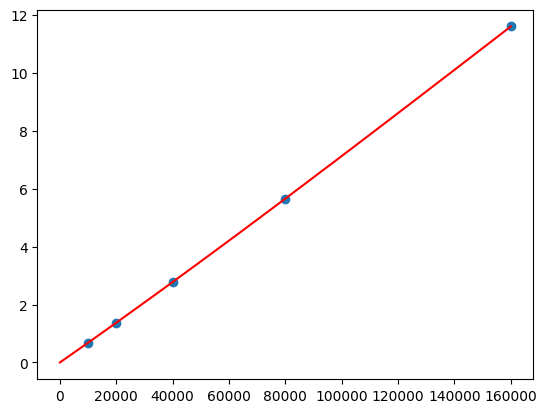

In [37]:
x = sizes
y = [0.686,1.38,2.77,5.66,11.6]
c, misfit = fit_poly(x,y,3)
print ("coefficients:",c)
print ("misfit:", misfit)

xx = np.linspace(0,x[-1],100)
yy = xx * 0
for idx,cc in enumerate(c):
    yy = yy + cc*xx**idx

plt.plot(x, y, 'o')
plt.plot(xx, yy, 'r')
plt.show()

Filling and emptying a queue (n elements) based on Python's deque takes: O(1). Therefore, a single enqueue() or dequeue() takes: O(1). Read up on wikipedia on "deque" and state the cost for the operations for:
1. add element on left: O(1)
2. add element on right: O(1)
3. remove element on left: O(1)
4. remove element on right: O(1)

Is that what you see? Yes

## Question 3: Now implement a deque using a doubly-linked list
Complete the implementation, make sure the tests work, and finally time the operations.

In [20]:
class MyDeque:
    """ a double-ended queue implemented using a linked list"""
 
    class ListItem:
        """ an item in a doubly-linked list"""
        def __init__(self, x, prev, next):
            self.item = x
            self.next = next
            self.prev = prev

    def __init__(self):
        self.head = None
        self.tail = None
        
    def push_right(self, x):
        if self.head == None:
            self.head = MyDeque.ListItem(x,None, None)
            self.tail = self.head
        else:
            n = MyDeque.ListItem(x, self.tail, None)
            self.tail.next = n
            self.tail = n
            
    def push_left(self, x):
        #TODO
        if self.head == None:
            self.head = MyDeque.ListItem(x,None, None)
            self.tail = self.head
        else:
            n = MyDeque.ListItem(x, None, self.head)
            self.head.prev = n
            self.head = n
   
    def pop_left(self):
        if self.head == None:
            return None
        item = self.head.item
        if self.head.next == None:
            self.head = None
            self.tail = None
        else:
            newhead = self.head.next
            newhead.prev = None
            self.head = newhead
        return item
    
    def pop_right(self):
        # TODO
        if self.tail == None:
            return None
        item = self.tail.item
        if self.tail.prev == None:
            self.head = None
            self.tail = None
        else:
            newtail = self.tail.prev
            newtail.next = None
            self.tail = newtail
        return item
    
    def print_it(self):
        it = self.head
        print ("[[ ", end="")
        while it != None:
            print (it.item, end=" ")
            it = it.next
        print ("]]")

Q = MyDeque()
Q.push_right(1)
Q.push_right(2)
Q.push_right(3)
Q.push_left(0)
Q.push_right(4)
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())
Q.print_it()
print ("pop_left:", Q.pop_left())
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())
Q.print_it()
print ("pop_left:", Q.pop_left())
print ("pop_right:", Q.pop_right())

[[ 0 1 2 3 4 ]]
pop_left: 0
pop_right: 4
[[ 1 2 3 ]]
pop_left: 1
[[ 2 3 ]]
pop_left: 2
pop_right: 3
[[ ]]
pop_left: None
pop_right: None


In [39]:
import lolviz
Q = MyDeque()
Q.push_right(1)
Q.push_right(2)
Q.push_left(0)
lolviz.objviz(Q)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [25]:
# some more tests:

Q = MyDeque()
Q.push_left(1)
Q.push_right(2)
assert(Q.head.item == 1)
assert(Q.tail.item == 2)
assert(Q.head.next == Q.tail)
assert(Q.head.prev == None)
assert(Q.tail.prev == Q.head)
assert(Q.pop_right()==2)
assert(Q.head.item == 1)
assert(Q.head == Q.tail)
assert(Q.head.prev == None)
assert(Q.head.next == None)
assert(Q.pop_right()==1)
assert(Q.head == None)
assert(Q.tail == None)

for n in range(5):
    Q.push_right(n)
Q.print_it()    
for n in range(5):
    assert(Q.pop_left()==n)
assert(Q.pop_left()==None) 

for n in range(5):
    Q.push_left(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_right()==n)
assert(Q.pop_right()==None)

for n in range(5):
    Q.push_right(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_right()==4-n)
    
for n in range(5):
    Q.push_left(n)
Q.print_it()
for n in range(5):
    assert(Q.pop_left()==4-n)

print ("ok")

[[ 0 1 2 3 4 ]]
[[ 4 3 2 1 0 ]]
[[ 0 1 2 3 4 ]]
[[ 4 3 2 1 0 ]]
ok


In [26]:
def test_our_deque(n):
    Q = MyDeque()
    for idx in range(n):
        Q.push_right(n)
        Q.push_left(n)
        
    for idx in range(n):
        Q.pop_left()
        Q.pop_right()

sizes = [10000, 20000, 40000, 80000, 160000]
for n in sizes:
    %timeit test_our_deque(n)

8.96 ms ± 55.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36.4 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
74.2 ms ± 656 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
147 ms ± 552 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


test_our_deque() takes: O(N). Therefore, all operations take O(1) as expected!